# Comparing spectra in KGB-evolution with gevolution and hiclass

In [2]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os
text_size=26
fig_size_x=24
fig_size_y=14
import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()
from collections import defaultdict

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(5, list)


In [3]:
# redshifts=[100, 30, 10, 3, 1, 0];
redshifts = [100, 90, 80, 50, 30]
# address_ref='/Users/farbod/Packages/gevolution-1.2/output/'

for i in range(np.shape(redshifts)[0]):
    data["kgb_ev"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
        "./../output/backgroundKGB/pk_00" + str(i) + "_pi_k.dat"
    )
    data["kgb_ev"]["zeta"]["z=" + str(redshifts[i])] = np.loadtxt(
        "./../output/backgroundKGB/pk_00" + str(i) + "_zeta.dat"
    )
    data["kgb_ev"]["m"]["z=" + str(redshifts[i])] = np.loadtxt(
        "./../output/backgroundKGB/pk_00" + str(i) + "_delta.dat"
    )
    data["kgb_ev"]["phi"]["z=" + str(redshifts[i])] = np.loadtxt(
        "./../output/backgroundKGB/pk_00" + str(i) + "_phi.dat"
    )
    data["kgb_ev"]["chi"]["z=" + str(redshifts[i])] = np.loadtxt(
        "./../output/backgroundKGB/pk_00" + str(i) + "_chi.dat"
    )
    data["kgb_ev"]["hij"]["z=" + str(redshifts[i])] = np.loadtxt(
        "./../output/backgroundKGB/pk_00" + str(i) + "_hij.dat"
    )
    data["kgb_ev"]["B"]["z=" + str(redshifts[i])] = np.loadtxt(
        "./../output/backgroundKGB/pk_00" + str(i) + "_B.dat"
    )

    #     data['gev']['m']['z='+str(redshifts[i])] = np.loadtxt(address_ref+"lcdm_pk00"+str(i)+"_delta.dat")
    #     data['gev']['phi']['z='+str(redshifts[i])] = np.loadtxt(address_ref+"lcdm_pk00"+str(i)+"_phi.dat")
    #     data['gev']['chi']['z='+str(redshifts[i])] = np.loadtxt(address_ref+"lcdm_pk00"+str(i)+"_chi.dat")
    #     data['gev']['hij']['z='+str(redshifts[i])] = np.loadtxt(address_ref+"lcdm_pk00"+str(i)+"_hij.dat")
    #     data['gev']['B']['z='+str(redshifts[i])] = np.loadtxt(address_ref+"lcdm_pk00"+str(i)+"_B.dat")

    #     data['class_tk']['z='+str(redshifts[i])] = np.loadtxt("./../../hi_class_pub_devel_test//output/kgb_hiclass_z"+str(i+1)+"_tk.dat")
    #     data['class_pk']['z='+str(redshifts[i])] = np.loadtxt("./../../hi_class_pub_devel_test/output/kgb_hiclass_z"+str(i+1)+"_pk.dat")

    data["class_tk"]["z=" + str(redshifts[i])] = np.loadtxt(
        "./../../hiclass_new/output/backgroundHicalss/file_classz" + str(i + 1) + "_tk.dat"
    )
    data["class_pk"]["z=" + str(redshifts[i])] = np.loadtxt(
        "./../../hiclass_new/output/file_classz" + str(i + 1) + "_pk.dat"
    )

gev_bg = np.loadtxt("./../output/file_background.dat")
bg = np.loadtxt("./../../hiclass_new/output/file_classbackground.dat")
# bg_test= np.loadtxt("./../../hi_class_pub_devel/output/kgb_hiclass_background.dat")

Hconf_hiclass = interpolate.interp1d(1.0 / (1.0 + bg[:, 0]), bg[:, 3])


### cosmological params:
As = 2.215 * 1.0e-9
h = 0.67556
kp = 0.05 / h
ns = 0.9619
cs2 = 1.0e-7
c = 2.99792458 * 1.0e5
# Km/s
H0 = 100 * h / c
# H0 in 1/Mpc unit. 0.00022593979933110373
w = -0.9

FileNotFoundError: ./../../hiclass_new/output/file_classz1_tk.dat not found.

# Background test

## Particle horizon

/tmp/ipykernel_262544/1175660729.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)


(500.0, 20000.0)

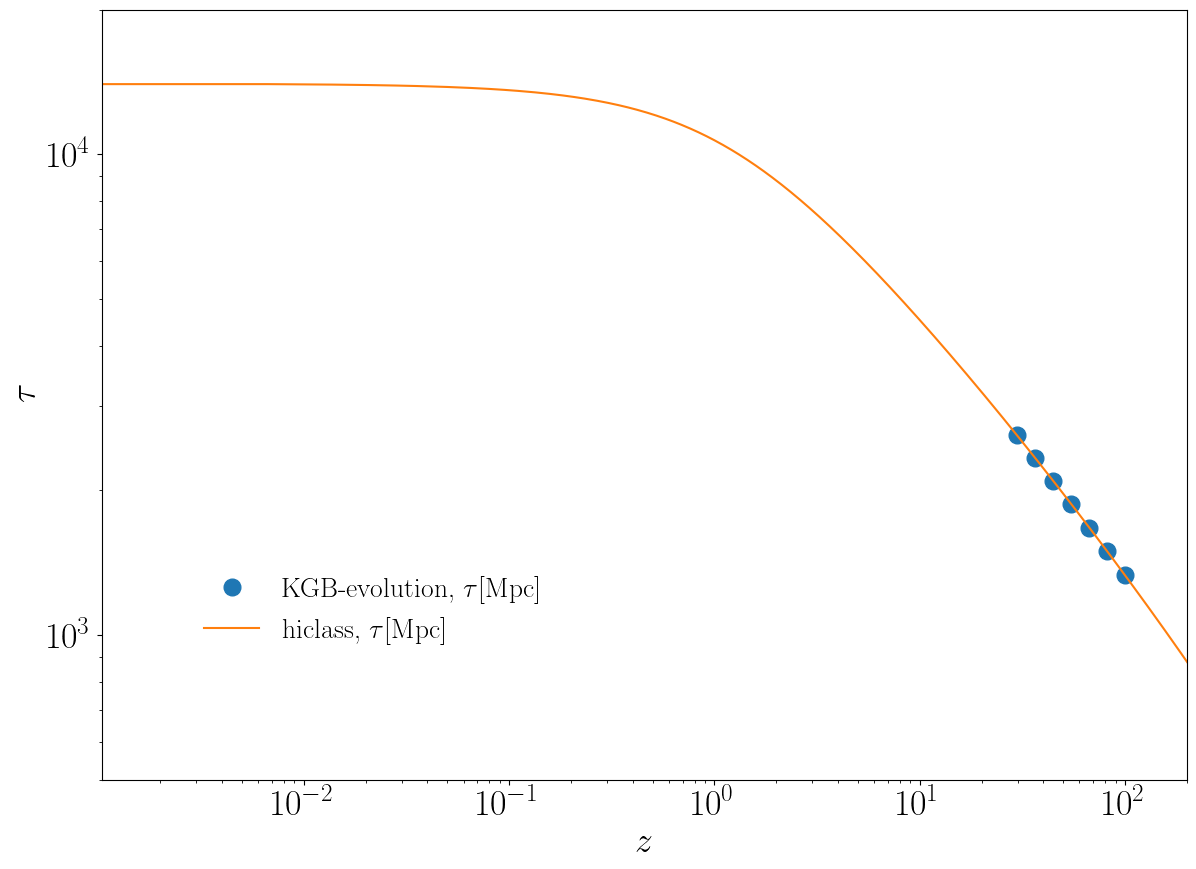

In [59]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))

Boxsize =1000.0 # Mpc/h
num=5
plt.plot(1./gev_bg[::num,2]-1,gev_bg[::num,1]*Boxsize/h ,"o",markersize=12,label=r"KGB-evolution, $\tau$[Mpc]")
# hiclass:
plt.plot(bg[:,0],bg[:,2],label=r"hiclass, $\tau$[Mpc]")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\tau$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
plt.ylim(5.e2,2.e4)

## Hubble parameter

/tmp/ipykernel_262544/3085043568.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)


(0.1, 20.0)

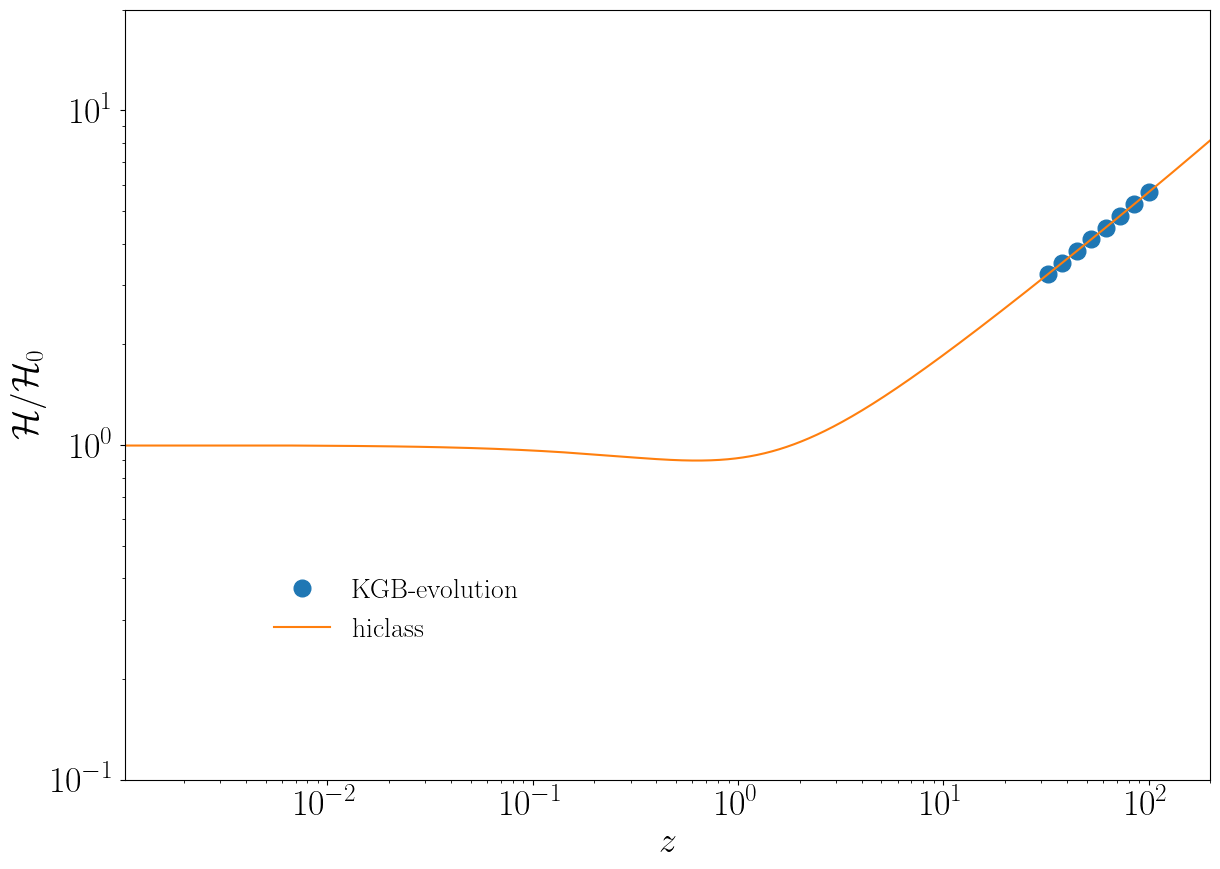

In [60]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))

num=4
plt.plot(1./gev_bg[::num,2]-1,gev_bg[::num,3] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],bg[:,3]*a/bg[-1:,3],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\mathcal{H}/\mathcal{H}_0$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
plt.ylim(1.e-1,2.e1)

## $\mathcal{H}'$

/tmp/ipykernel_262544/1913793681.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)


(0.1, 20000.0)

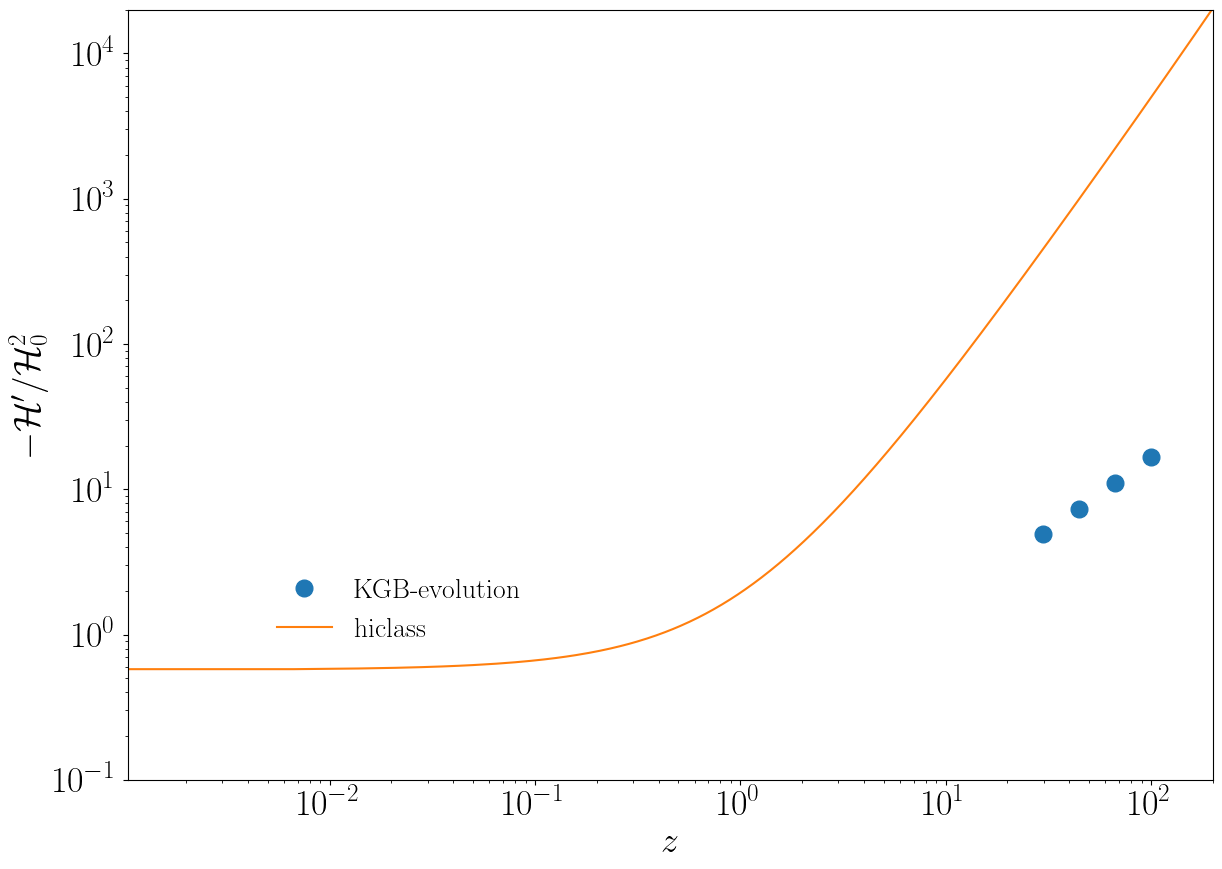

In [61]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
# 
# Boxsize = 200000.0 # Mpc/h
num=10
plt.plot(1./gev_bg[::num,2]-1,-gev_bg[::num,4] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],-bg[:,4]/bg[-1:,3]/bg[-1:,3],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$-\mathcal{H}'/\mathcal{H}_0^2$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
plt.ylim(1.e-1,2.e4)

## $\mathcal{H}''$

/tmp/ipykernel_262544/3609557109.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)


(0.1, 200000.0)

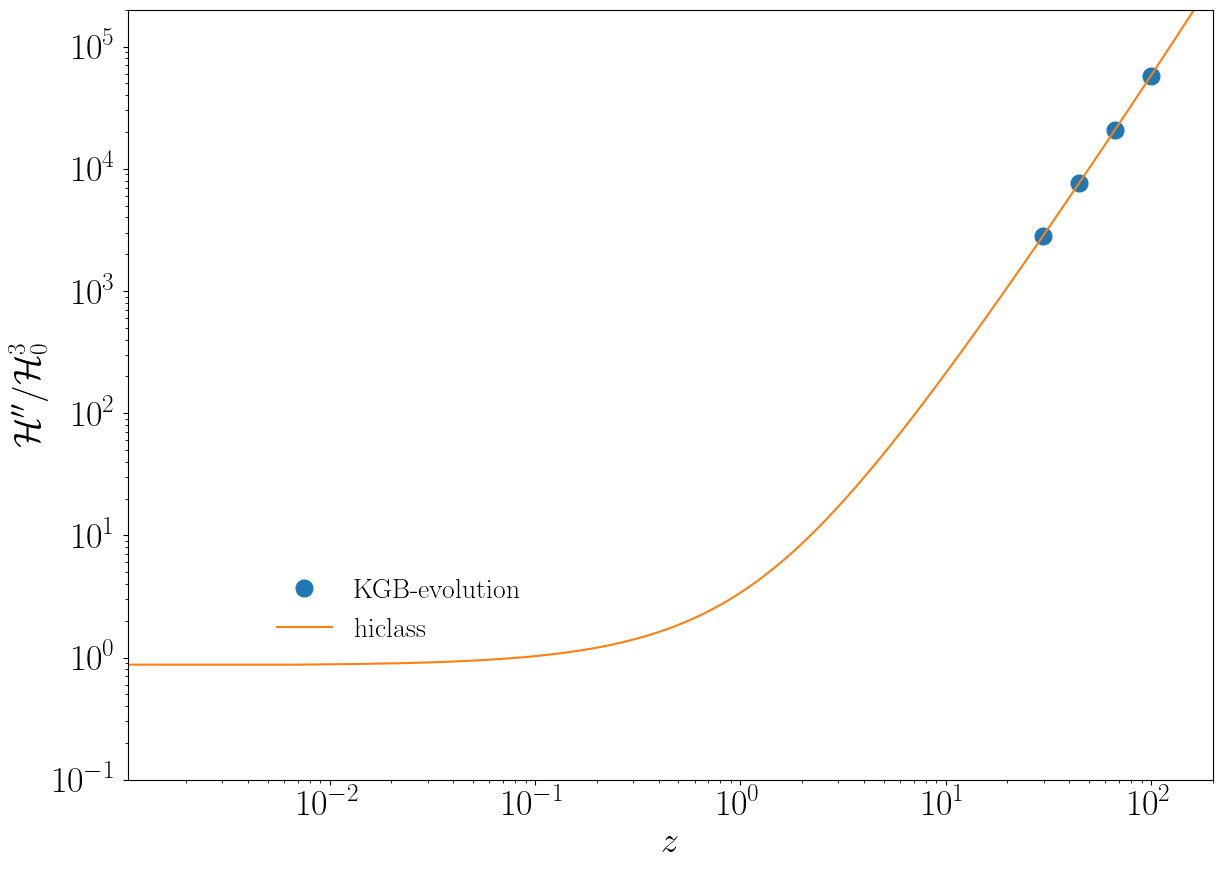

In [52]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
# 
# Boxsize = 200000.0 # Mpc/h
num=10
plt.plot(1./gev_bg[::num,2]-1,gev_bg[::num,5] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],bg[:,32]/bg[-1:,3]/bg[-1:,3]/bg[-1:,3],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\mathcal{H}''/\mathcal{H}_0^3$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
plt.ylim(1.e-1,2.e5)

## $\alpha_K$, $\alpha_k'$

/tmp/ipykernel_262544/2337115189.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)
/tmp/ipykernel_262544/2337115189.py:44: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)


(0.0010377764019807963, 200)

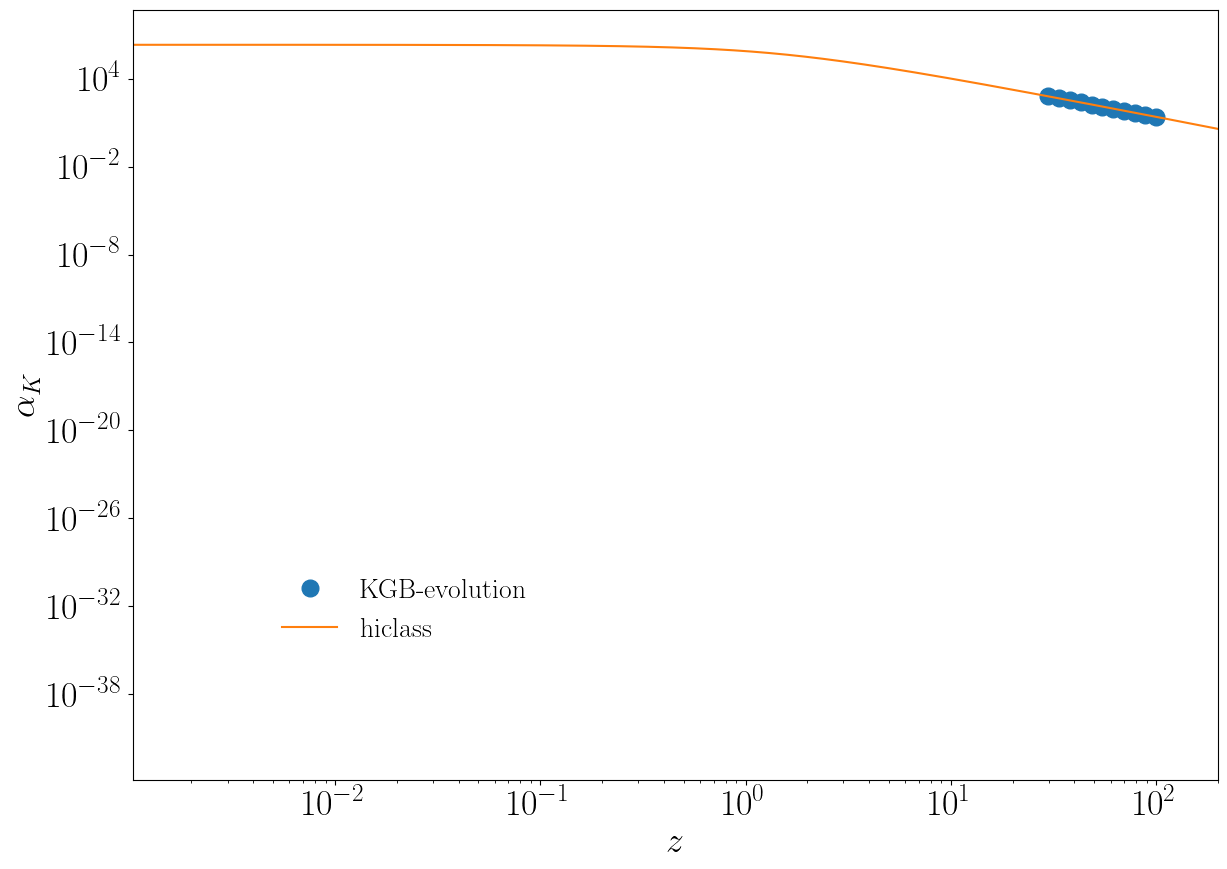

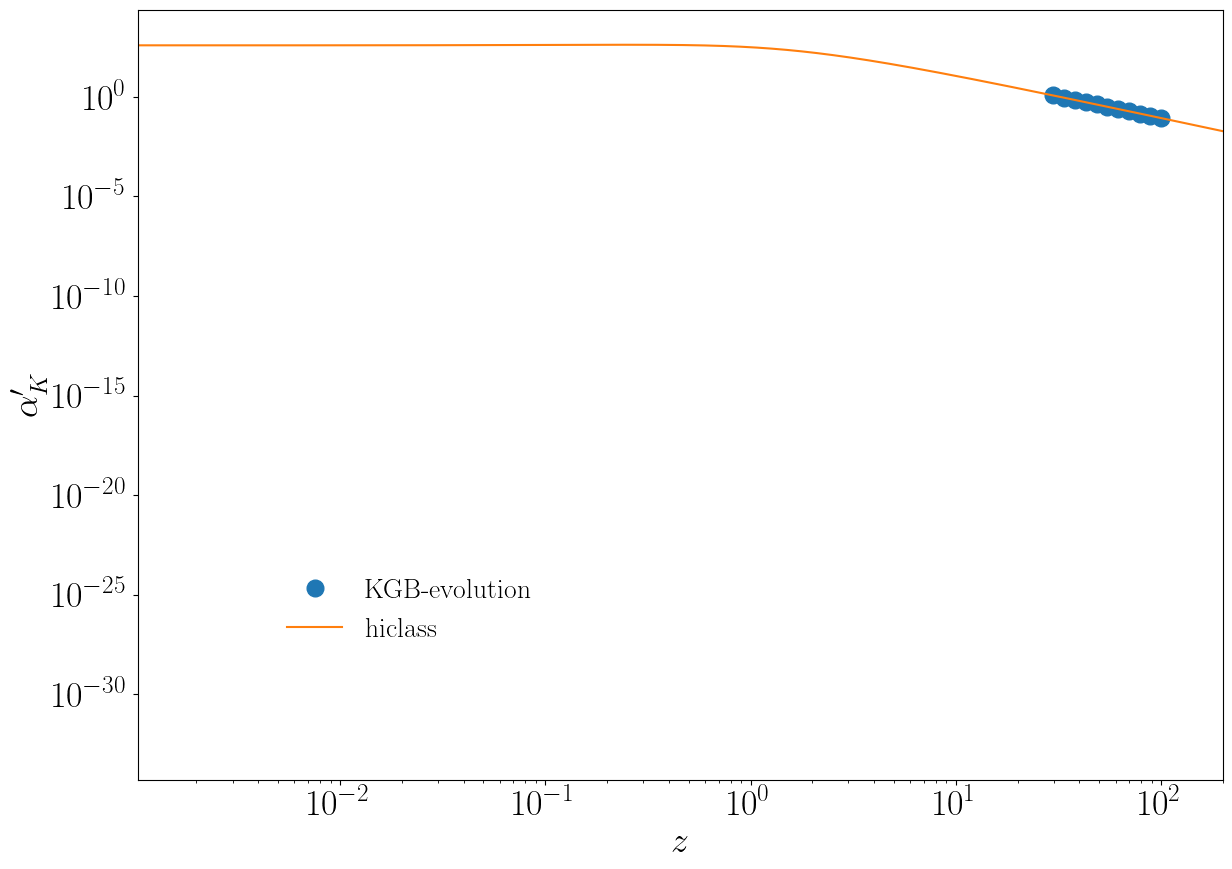

In [53]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
# 
# Boxsize = 200000.0 # Mpc/h
num=3
plt.plot(1./gev_bg[::num,2]-1,gev_bg[::num,6] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],bg[:,25],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\alpha_K$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
# plt.ylim(1.e-5,2.e5)

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
# 
# Boxsize = 200000.0 # Mpc/h
num=3
plt.plot(1./gev_bg[::num,2]-1,gev_bg[::num,8] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],bg[:,35],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\alpha_K'$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
# plt.ylim(1.e-4,2.e2)

##  $\alpha_B$, $\alpha_B'$

/tmp/ipykernel_262544/924781165.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)
/tmp/ipykernel_262544/924781165.py:44: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)


(0.0010377764019807963, 200)

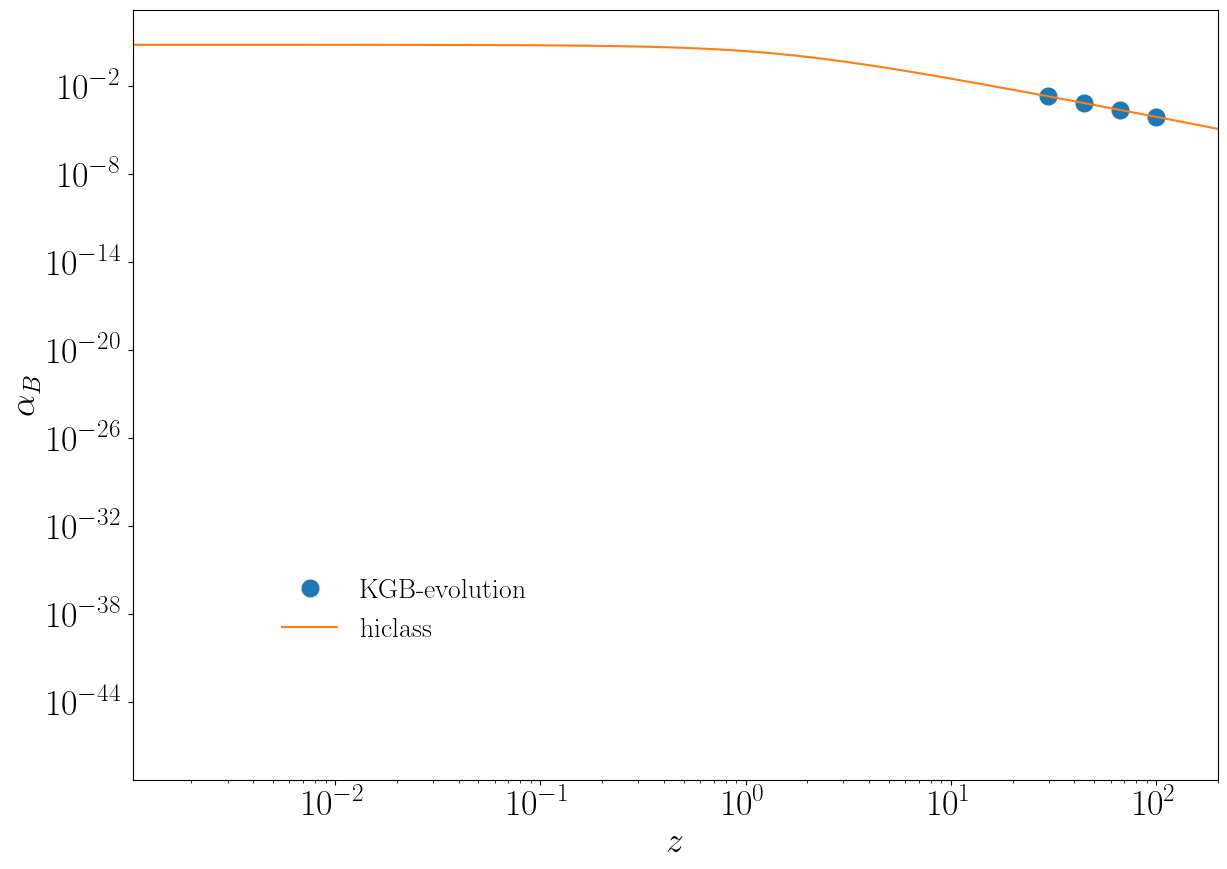

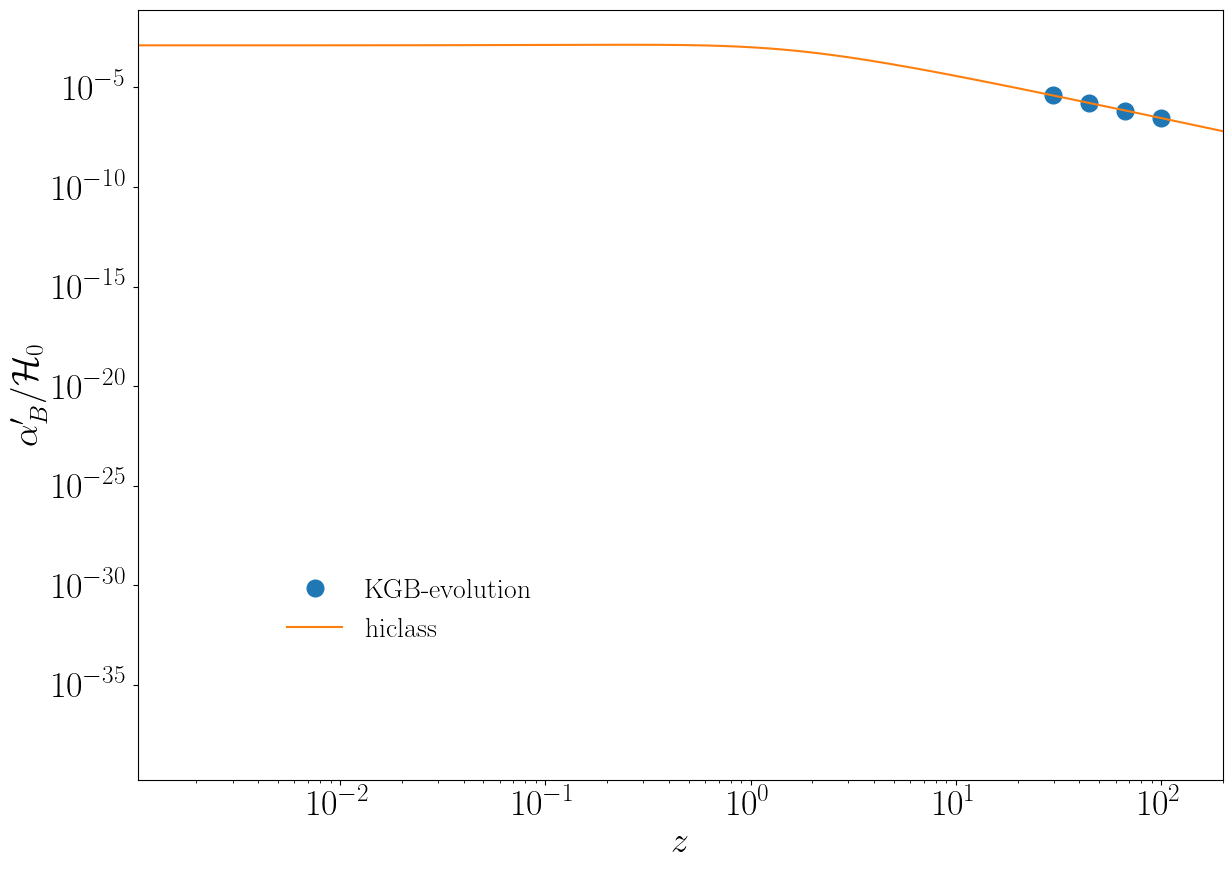

In [55]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
# 
# Boxsize = 200000.0 # Mpc/h
num=10
plt.plot(1./gev_bg[::num,2]-1,gev_bg[::num,7] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],bg[:,26],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\alpha_B$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
# plt.ylim(1.e-7,2.e0)

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
# 
# Boxsize = 200000.0 # Mpc/h
num=10
plt.plot(1./gev_bg[::num,2]-1,gev_bg[::num,9] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],bg[:,36],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\alpha_B'/\mathcal{H}_0$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
# plt.ylim(1.e-6,2.e0)

## $P_{smg}$, $\rho_{smg}$, $P_{smg}'$

/tmp/ipykernel_262544/2520627350.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)
/tmp/ipykernel_262544/2520627350.py:45: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)
/tmp/ipykernel_262544/2520627350.py:68: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,200)


(1e-15, 2e-07)

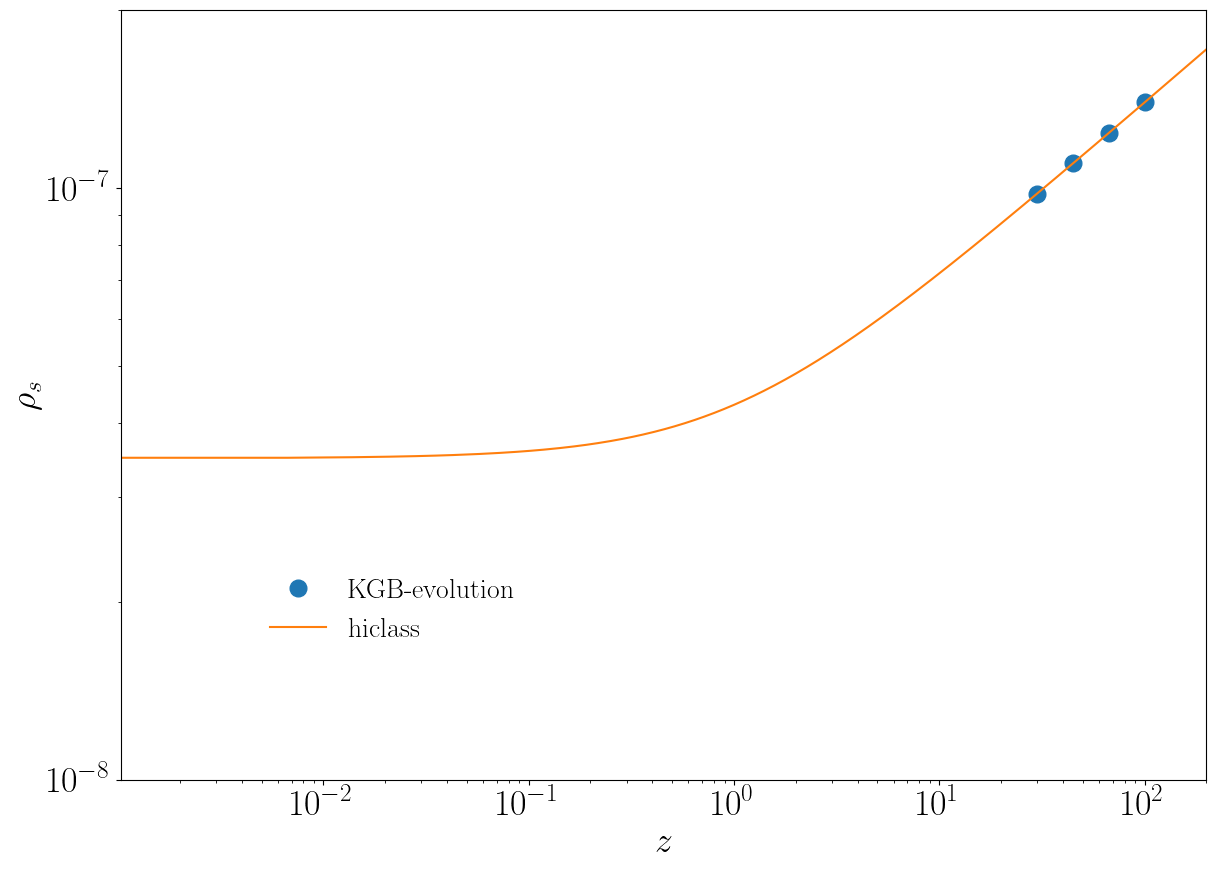

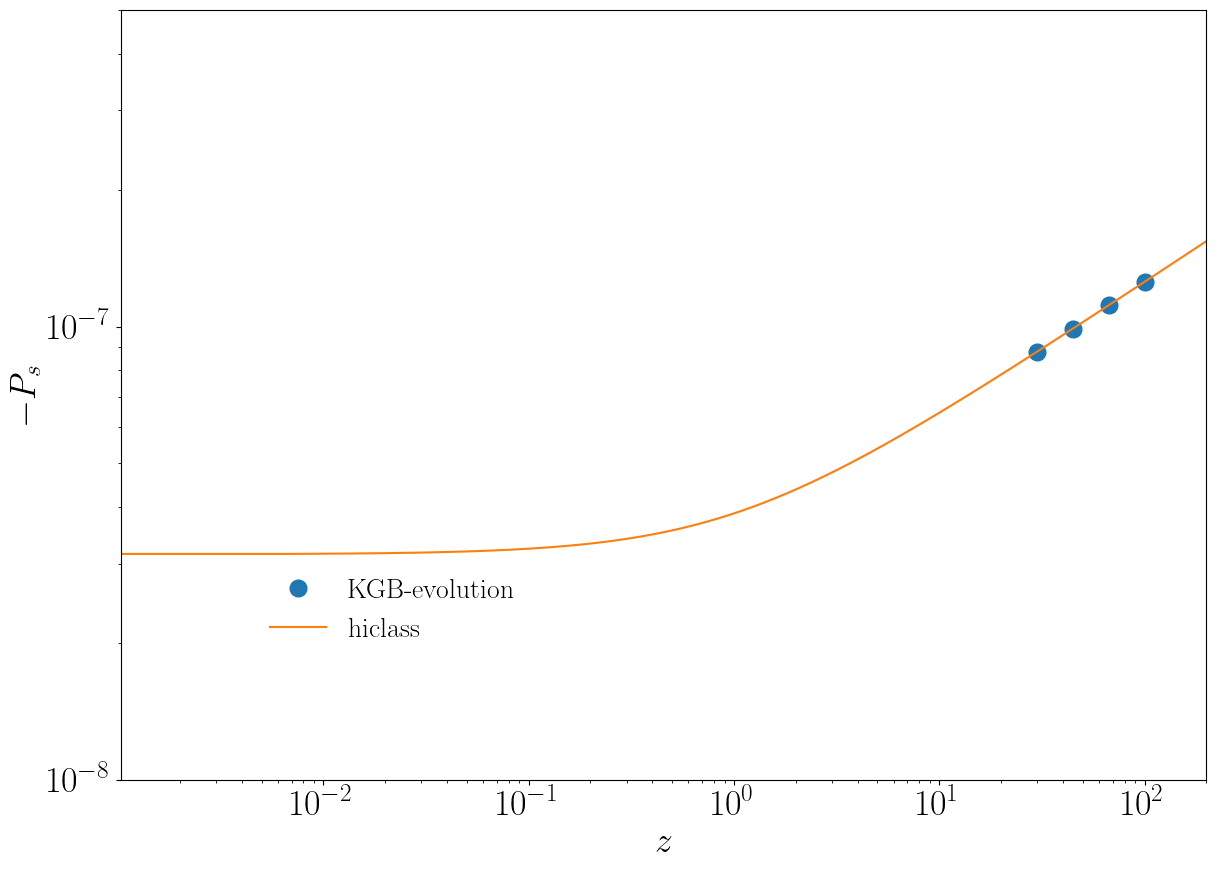

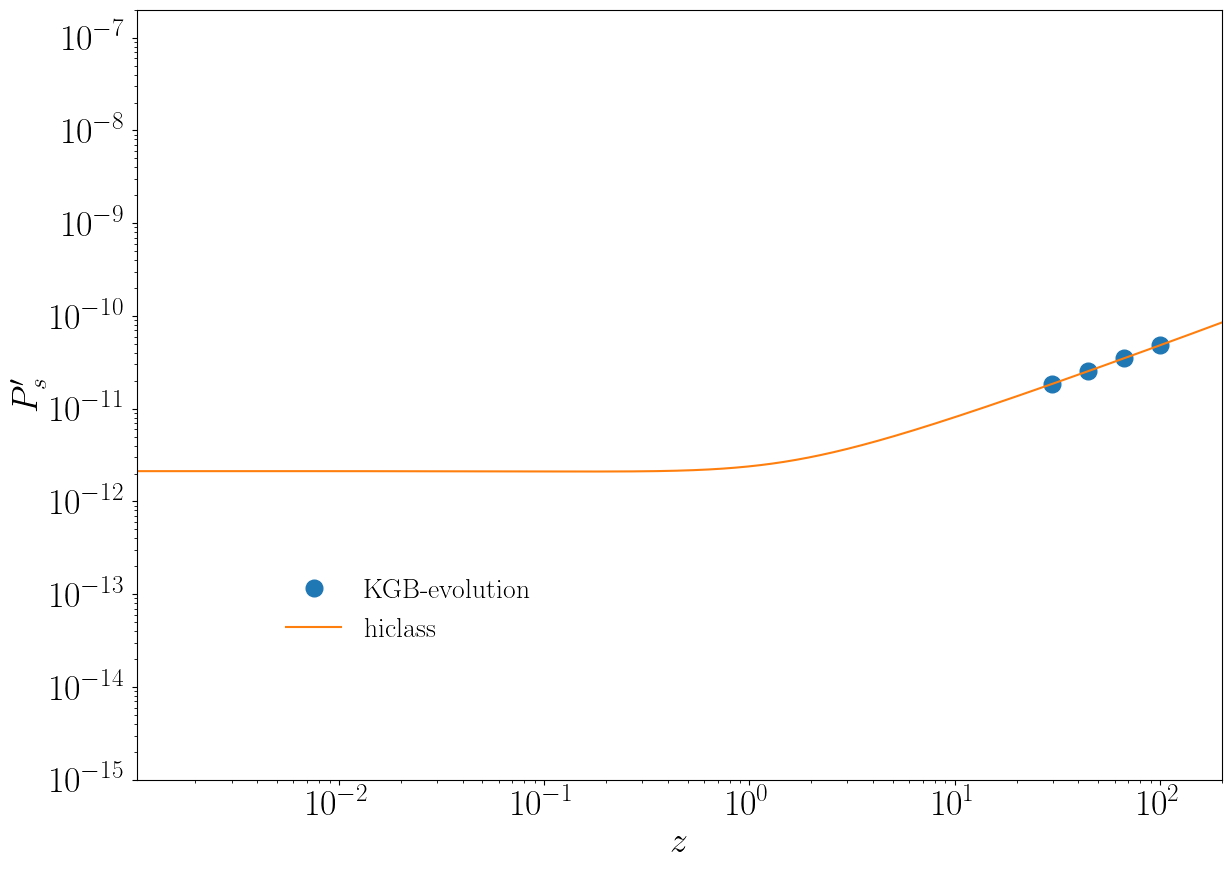

In [56]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
# 
# Boxsize = 200000.0 # Mpc/h
num=10
plt.plot(1./gev_bg[::num,2]-1,gev_bg[::num,13] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],bg[:,19],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$\rho_s$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
plt.ylim(1.e-8,2.e-7)

############################
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
# 
# Boxsize = 200000.0 # Mpc/h
num=10
plt.plot(1./gev_bg[::num,2]-1,-gev_bg[::num,17] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],-bg[:,20],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$-P_s$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
plt.ylim(1.e-8,5.e-7)
############################
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
# 
# Boxsize = 200000.0 # Mpc/h
num=10
plt.plot(1./gev_bg[::num,2]-1,gev_bg[::num,19] ,"o",markersize=12,label=r"KGB-evolution")
# hiclass:
a = 1./(1.+bg[:,0])
plt.plot(bg[:,0],bg[:,22],label=r"hiclass")

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$P_s'$")
plt.xlabel(r"$z$")
plt.legend(fontsize=20,bbox_to_anchor=[0.25,0.22],loc="center",frameon=False)
plt.xlim(0,200)
plt.ylim(1.e-15,2.e-7)

# Power spectra

## $V_x$ power spectrum

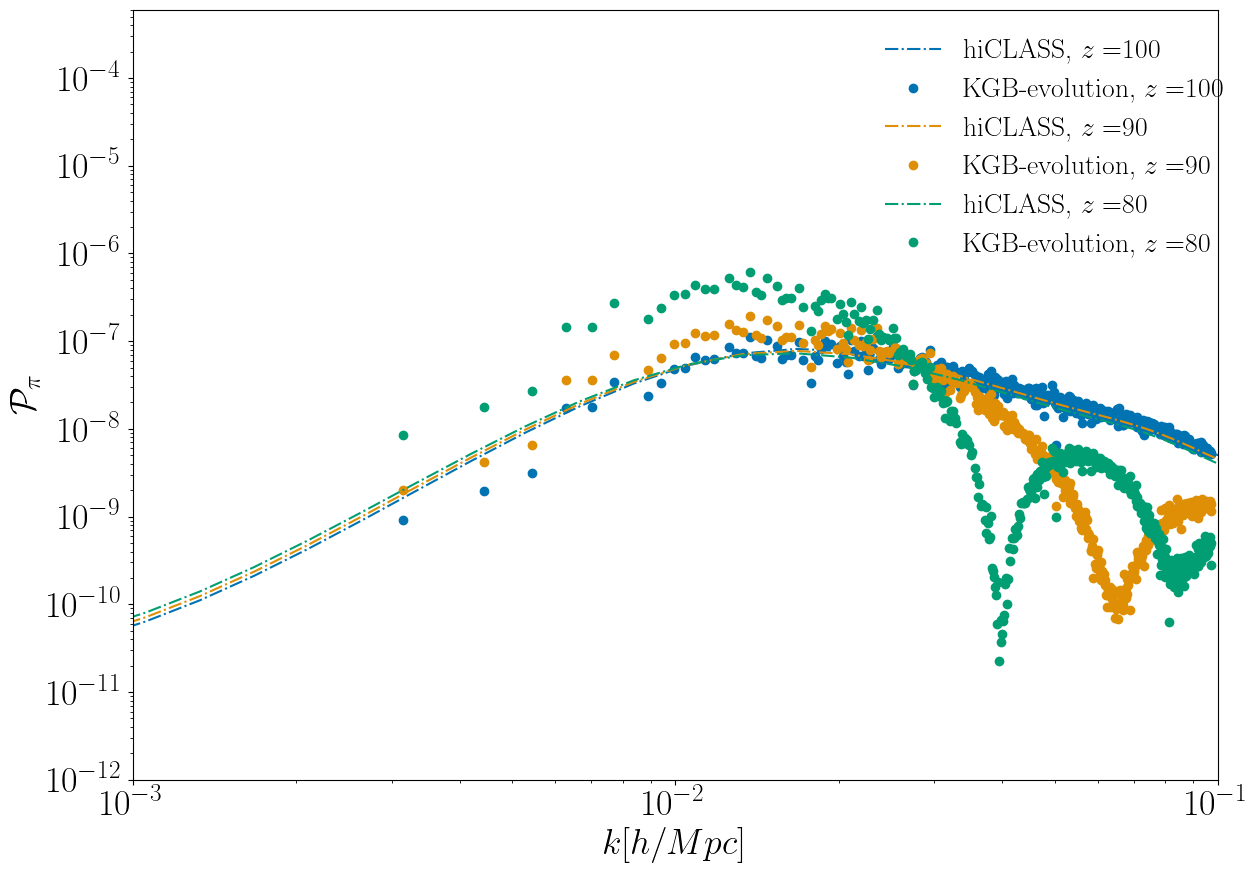

In [10]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))

#########
## scalar_field
#########
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = data['class_tk']['z='+str(redshifts[i])][:,0];
zini = 100.
aini = 1./(1+zini);
Normlization = As*(k_q/kp)**(ns-1.);
######

H0_hiclass = bg[-1:,3];
a_hiclass = 1./(1.+bg[:,0])

# Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass)
# scalar = interpolate.interp1d(bg[:,0],bg[:,29])
# scalar_p = interpolate.interp1d(bg[:,0],bg[:,30])
# scalar_pp = interpolate.interp1d(bg[:,0],bg[:,31])

#  bg[::num,30]/(bg[-1:,3])


###### hiclass results:
# redshifts = [100,50,20]
l=0
for i in range(0,3):
#     print("z=",redshifts[i])
    class_tk = data['class_tk']['z='+str(redshifts[i])];
    a = 1./(1. + redshifts[i])
    alpha = (class_tk[:,11] + 6.0 *class_tk[:,13] )/(2.*k_q*k_q *h*h);
    Vx = class_tk[:,5]
    pi = Vx/a + alpha; # gauge transfomration to the Newtonian gauge #NOTE that v_x is in [1/Mpc]
#     pi = Vx * (1+redshifts[i]);  # pi = V_x/a
    # pi [T] * H0[1/T] to make it dimensionless
    plt.plot(class_tk[:,0], (pi * Hconf_hiclass(0.))**2* Normlization,"-.", color = Colors[l] , label = "hiCLASS, $z=$"+str(redshifts[i]))

    # EQ-evolution
    k = data['kgb_ev']['pi']['z='+str(redshifts[i])][:,0]
    pk = data['kgb_ev']['pi']['z='+str(redshifts[i])][:,1]
    plt.plot(k, pk,"o", color = Colors[l] , label = "KGB-evolution, $z=$"+str(redshifts[i]))
    l=l+1
plt.legend(fontsize=20,bbox_to_anchor=[0.85,0.82],loc="center",frameon=False)
plt.ylabel(r"$\mathcal{P}_{\pi}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-3,1.e-1)
plt.ylim(1.e-12,6.e-4)
plt.show()


## $\pi$' power

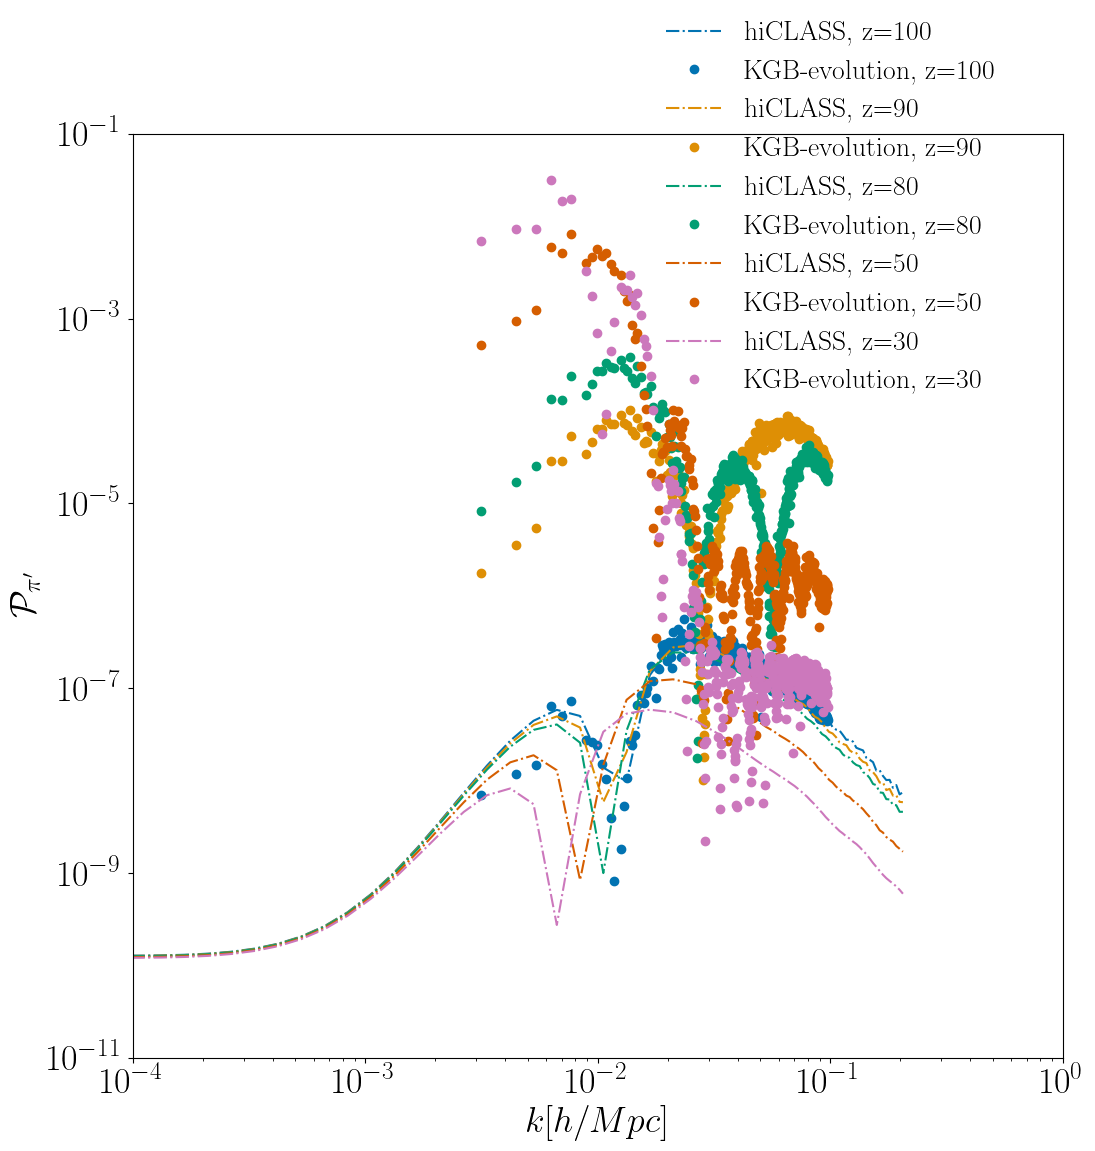

In [11]:
###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = data['class_tk']['z='+str(redshifts[i])][:,0];


Normlization = As*(k_q/kp)**(ns-1.);

H0_hiclass = bg[-1:,3];
# Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
a_hiclass = 1./(1.+bg[:,0])

#####################
## scalar_field_prime
#####################


plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,12))

###### hiclass results:
# redshifts = [100,50,20]
l=0
for i in range(0,5):

    class_tk = data['class_tk']['z='+str(redshifts[i])];
#     alpha = (class_tk[:,11] + 6.0 *class_tk[:,13] )/(2.*k_q*k_q);
    
#     Vx = Vx +  alpha/h/h; # gauge transfomration to the Newtonian gauge #NOTE that v_x is in [1/Mpc]
    z = redshifts[i];
    a = 1./(1+z)
    alpha_prime = (class_tk[:,9] + class_tk[:,8] -  class_tk[:,12]);
    alpha = (class_tk[:,11] + 6.0 *class_tk[:,13] )/(2.*k_q*k_q *h*h);
    Vx_prime = class_tk[:,6]; #+ alpha_prime; # gauge transfomration
    Vx = class_tk[:,5]
    pi_prime = (Vx_prime/a) -  (Vx/a)  * Hconf_hiclass(z) + alpha_prime #* scalar_p(z)*(1+z)# +  delta_phi * (scalar_pp(z)/ scalar_p(z) - Hconf_hiclass(z) ) #+ Vx * (- Hconf_hiclass(z) * scalar_p(z) + scalar_pp(z)))/aini;
    # delta phi'[gev] [1/T] = phi'[gev][1/T]/a * V_X'[1] + delta phi_gev[1] * (phi''[gev][1/T^2]/phi'[gev][1/T] - H_gev[1/T])
    # deltaphi'(output) = delta phi'[gev] [1/T] /H0(gev)
#     pi_prime = Vx_prime/a -  (Vx/a) * Hconf_hiclass(z) #* scalar_p(z)*(1+z)# +  delta_phi * (scalar_pp(z)/ scalar_p(z) - Hconf_hiclass(z) ) #+ Vx * (- Hconf_hiclass(z) * scalar_p(z) + scalar_pp(z)))/aini;

    plt.plot(class_tk[:,0], (pi_prime)**2* Normlization,"-.", color = Colors[l] , label = " hiCLASS, z="+str(z))
    # EQ-evolution\
    
    k = data['kgb_ev']['pi_prime']['z='+str(redshifts[i])][:,0]
    pk = data['kgb_ev']['pi_prime']['z='+str(redshifts[i])][:,1]
    plt.plot(k, pk,"o", color = Colors[l] , label = "KGB-evolution, z="+str(redshifts[i]))
    l=l+1
plt.legend(fontsize=20,bbox_to_anchor=[0.75,0.92],loc="center",frameon=False)
plt.ylabel(r"$\mathcal{P}_{\pi'}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-4,1.e0)
plt.ylim(1.e-11,1.e-1)
plt.show()


# Matter/potential power spectrum, gauge transformation

(1e-13, 1.0)

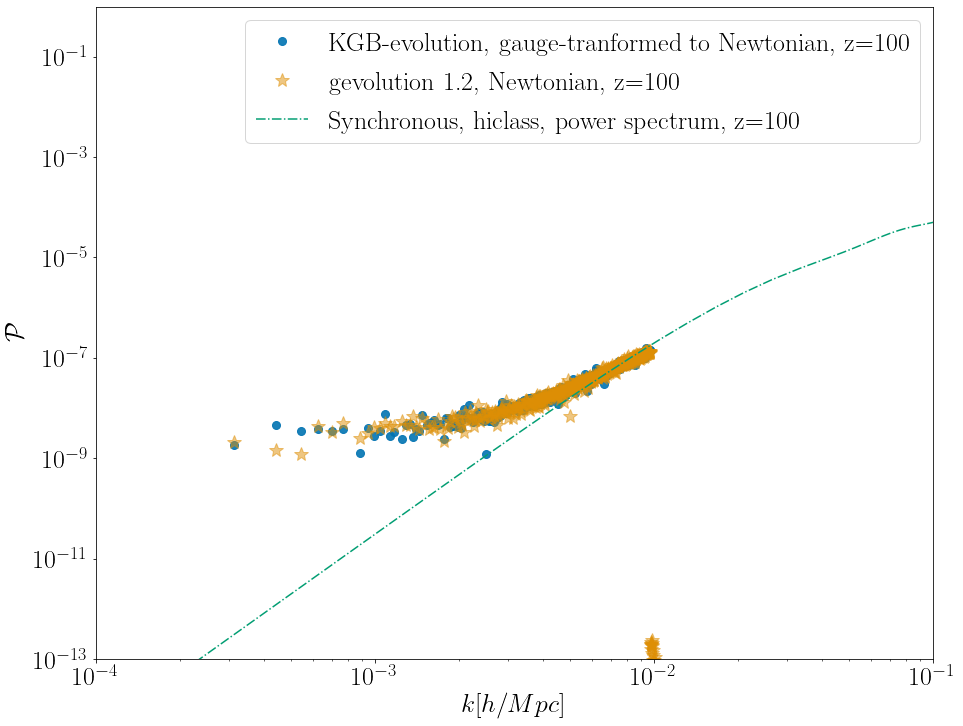

In [203]:
###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
# k_q = class_tk[0][:,0];
k_q = data['class_tk']['z='+str(redshifts[i])][:,0];

rho_fld = interpolate.interp1d(bg[:,0] ,bg[:,12])
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_rad = interpolate.interp1d(bg[:,0] ,bg[:,14])
rho_g = interpolate.interp1d(bg[:,0] ,bg[:,9])
rho_tot = interpolate.interp1d(bg[:,0] ,bg[:,16])
w_fld = interpolate.interp1d(bg[:,0] ,bg[:,13])

Normlization = As*(k_q/kp)**(ns-1.);

H0_hiclass = bg[-1:,3];
# Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,12))

# Reference:

###### hiclass results:
l=0
for i in range(0,1):
    z=redshifts[i]

    k_h = data['kgb_ev']['m']['z='+str(redshifts[i])] [:,0]
    pk = data['kgb_ev']['m']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"o", color = Colors[l],markersize=8 , label = r"KGB-evolution, gauge-tranformed to Newtonian, z="+str(z), alpha=0.9)

    
    k_h = data['gev']['m']['z='+str(redshifts[i])] [:,0]
    pk = data['gev']['m']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"*", color = Colors[l+1],markersize=15 , label = r"gevolution 1.2, Newtonian, z="+str(z), alpha=0.5)

    k_q = data['class_pk']['z='+str(redshifts[i])][:,0];
    pk = data['class_pk']['z='+str(redshifts[i])][:,1]
#     Normlization = As*(k_q/kp)**(ns-1.);
    plt.plot(k_q, pk*k_q**3/(2.*np.pi**2),"-.", color = Colors[l+2] , label = r"Synchronous, hiclass, power spectrum, z="+str(z))
    l=l+1
    


plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-4,1.e-1)
plt.ylim(1.e-13,1.e0)


In [144]:
# ###### Normalization factor
# As=2.215*1.e-9;
# h=0.67556;
# kp=0.05/h; 
# ns=0.9619;
# cs2=1.e-4;
# c=2.99792458*1.e5; #Km/s
# H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# w=-0.9;
# # k_q = tk_new[:,0];
# Normlization = As*(k_q/kp)**(ns-1.);



# H0_hiclass = bg[-1:,3];
# # Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
# Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
# rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
# rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])

# Pk_newt_hiclass=[]
# for i in range(np.shape(redshifts)[0]):
#     Pk_newt_hiclass.append(np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_pk.dat"));

# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,10))

# # plt.plot(ref_phi[:,0], (ref_phi[:,1]),"*", markersize=15, color = Colors[l+1] , label = "Ref, phi, z="+str(z), alpha=0.9)
# # # EQ evolution power
# # plt.plot(Eq_phi[:,0], (Eq_phi[:,1]),".", markersize=12, color = Colors[l] , label = "EQ-evolution, phi, z="+str(z), alpha=0.6)

# ###### hiclass results:
# # l=0
# l=0
# for i in range(0,1):
#     z=redshifts[i]

#     k_h = data['eq_ev']['m']['z='+str(redshifts[i])] [:,0]
#     pk_eq = data['eq_ev']['m']['z='+str(redshifts[i])] [:,1]
    
#     k_h = data['ref2']['m']['z='+str(redshifts[i])] [:,0]
#     pk = data['ref2']['m']['z='+str(redshifts[i])] [:,1]
    
#     plt.plot(k_h, np.abs(pk_eq-pk)/pk,"o", color = Colors[l],markersize=8 , label = r"Rel diff(eq vs gev2), z="+str(z), alpha=0.9)
    
#     k_h = data['ref2']['m']['z='+str(redshifts[i])] [:,0]
#     pk_eq = data['ref2']['m']['z='+str(redshifts[i])] [:,1]
    
#     k_h = data['ref']['m']['z='+str(redshifts[i])] [:,0]
#     pk = data['ref']['m']['z='+str(redshifts[i])] [:,1]
#     plt.plot(k_h, np.abs(pk_eq-pk)/pk,"*", color = Colors[l+1],markersize=8 , label = r"Rel diff (gev1 and gev2), z="+str(z), alpha=0.9)

#     l=l+1


# # plt.plot(gev_ref[:,0], (gev_ref[:,1]),"*", color = Colors[l+5] , label = r"gevolution, ref, $\phi$, z="+str(100))

# plt.legend()
# plt.ylabel(r"$\mathcal{P}$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-4,1.e0)
# # plt.ylim(0.8,1.2)


# Potential power spectrum

(1e-12, 1e-08)

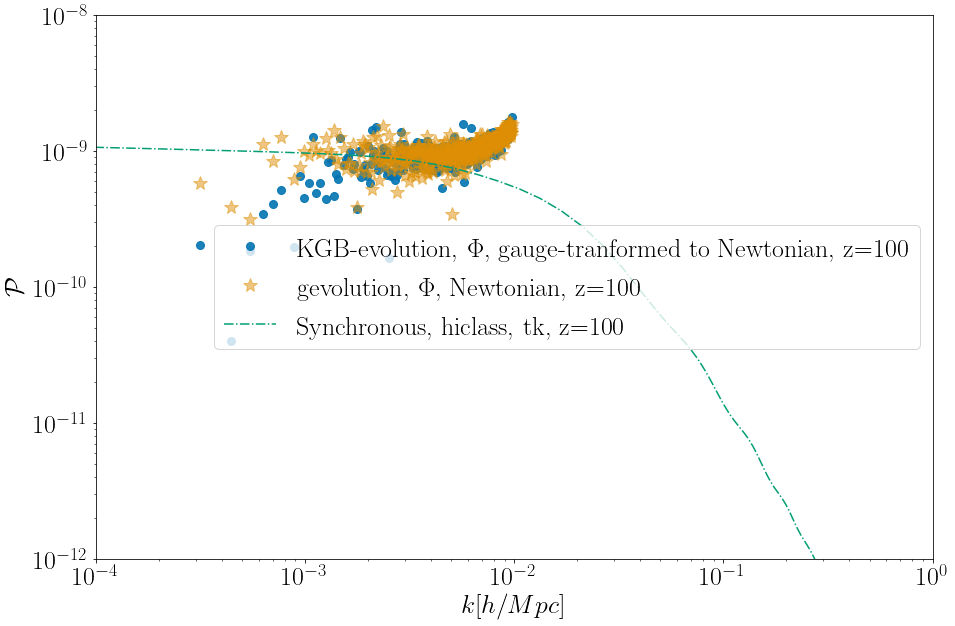

In [149]:
###### Normalization factor
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
k_q = data['class_tk']['z='+str(redshifts[i])][:,0];
Normlization = As*(k_q/kp)**(ns-1.);



H0_hiclass = bg[-1:,3];
# Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])

Pk_newt_hiclass=[]
for i in range(np.shape(redshifts)[0]):
    Pk_newt_hiclass.append(np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_pk.dat"));

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,10))

# plt.plot(ref_phi[:,0], (ref_phi[:,1]),"*", markersize=15, color = Colors[l+1] , label = "Ref, phi, z="+str(z), alpha=0.9)
# # EQ evolution power
# plt.plot(Eq_phi[:,0], (Eq_phi[:,1]),".", markersize=12, color = Colors[l] , label = "EQ-evolution, phi, z="+str(z), alpha=0.6)

###### hiclass results:
# l=0
l=0
for i in range(0,1):
    z=redshifts[i]

    k_h = data['kgb_ev']['phi']['z='+str(redshifts[i])] [:,0]
    pk = data['kgb_ev']['phi']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"o", color = Colors[l],markersize=8 , label = r"KGB-evolution, $\Phi$, gauge-tranformed to Newtonian, z="+str(z), alpha=0.9)

    
    k_h = data['gev']['phi']['z='+str(redshifts[i])] [:,0]
    pk = data['gev']['phi']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"*", color = Colors[l+1],markersize=15 , label = r"gevolution, $\Phi$, Newtonian, z="+str(z), alpha=0.5)

    k_q = data['class_tk']['z='+str(redshifts[i])][:,0];
    tk = data['class_tk']['z='+str(redshifts[i])]
    Normlization = As*(k_q/kp)**(ns-1.);
    pk = tk[:,8]**2*Normlization
#     Normlization = As*(k_q/kp)**(ns-1.);
    plt.plot(k_q, pk,"-.", color = Colors[l+2] , label = r"Synchronous, hiclass, tk, z="+str(z))
    l=l+1


# plt.plot(gev_ref[:,0], (gev_ref[:,1]),"*", color = Colors[l+5] , label = r"gevolution, ref, $\phi$, z="+str(100))

plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-4,1.e0)
plt.ylim(1.e-12,1.e-8)


In [150]:
# ###### Normalization factor
# As=2.215*1.e-9;
# h=0.67556;
# kp=0.05/h; 
# ns=0.9619;
# cs2=1.e-4;
# c=2.99792458*1.e5; #Km/s
# H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# w=-0.9;
# # k_q = tk_new[:,0];
# Normlization = As*(k_q/kp)**(ns-1.);



# H0_hiclass = bg[-1:,3];
# # Hconf = interpolate.interp1d(bg[:,0],bg[:,3])
# Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )
# rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
# rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])

# Pk_newt_hiclass=[]
# for i in range(np.shape(redshifts)[0]):
#     Pk_newt_hiclass.append(np.loadtxt("./../../EQ_hi_class/output/quin_z"+str(i+1)+"_pk.dat"));

# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,10))

# # plt.plot(ref_phi[:,0], (ref_phi[:,1]),"*", markersize=15, color = Colors[l+1] , label = "Ref, phi, z="+str(z), alpha=0.9)
# # # EQ evolution power
# # plt.plot(Eq_phi[:,0], (Eq_phi[:,1]),".", markersize=12, color = Colors[l] , label = "EQ-evolution, phi, z="+str(z), alpha=0.6)

# ###### hiclass results:
# # l=0
# l=0
# for i in range(0,1):
#     z=redshifts[i]

#     k_h = data['eq_ev']['phi']['z='+str(redshifts[i])] [:,0]
#     pk_eq = data['eq_ev']['phi']['z='+str(redshifts[i])] [:,1]
    
#     k_h = data['ref2']['phi']['z='+str(redshifts[i])] [:,0]
#     pk = data['ref2']['phi']['z='+str(redshifts[i])] [:,1]
    
#     plt.plot(k_h, np.abs(pk_eq-pk)/pk,"o", color = Colors[l],markersize=8 , label = r"Rel diff (Eq, gev2), z="+str(z), alpha=0.9)
    
    
#     k_h = data['ref2']['phi']['z='+str(redshifts[i])] [:,0]
#     pk_eq = data['ref2']['phi']['z='+str(redshifts[i])] [:,1]
    
#     k_h = data['ref']['phi']['z='+str(redshifts[i])] [:,0]
#     pk = data['ref']['phi']['z='+str(redshifts[i])] [:,1]
#     plt.plot(k_h, np.abs(pk_eq-pk)/pk,"*", color = Colors[l+1],markersize=8 , label = r"Rel diff (gev and gev2), z="+str(z), alpha=0.9)

    
#     l=l+1


# # plt.plot(gev_ref[:,0], (gev_ref[:,1]),"*", color = Colors[l+5] , label = r"gevolution, ref, $\phi$, z="+str(100))

# plt.legend()
# plt.ylabel(r"$\mathcal{P}$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-4,1.e0)
# # plt.ylim(-0.2,0.2)


# chi power

(1e-25, 1e-08)

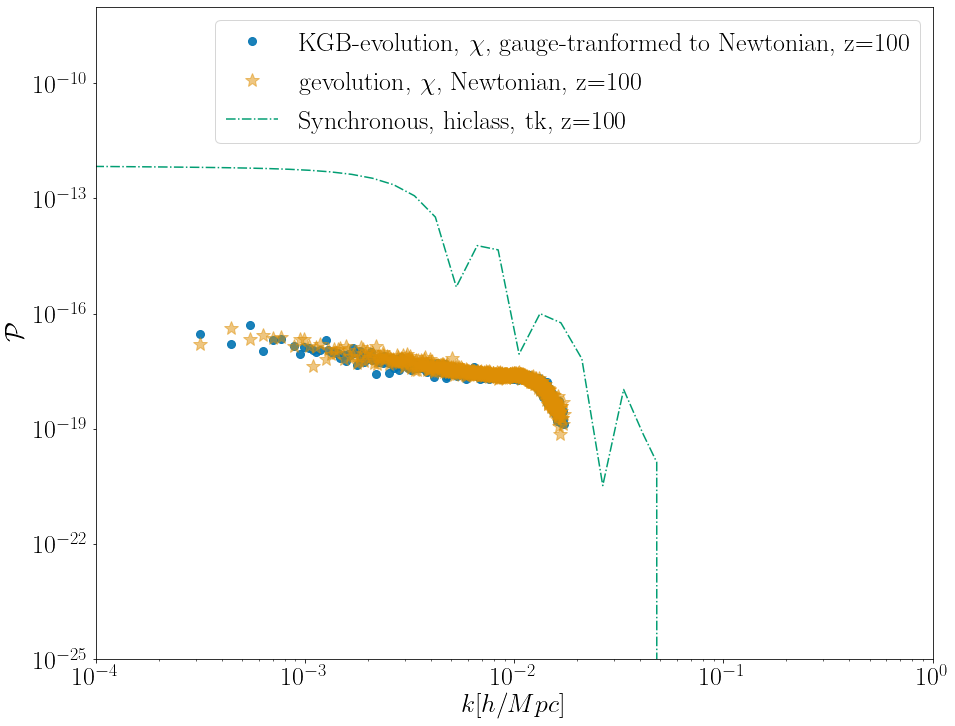

In [152]:


plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,12))

# Reference:

###### hiclass results:
l=0
for i in range(0,1):
    z=redshifts[i]

    k_h = data['kgb_ev']['chi']['z='+str(redshifts[i])] [:,0]
    pk = data['kgb_ev']['chi']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"o", color = Colors[l],markersize=8 , label = "KGB-evolution,  $\chi$, gauge-tranformed to Newtonian, z="+str(z), alpha=0.9)

    
    k_h = data['gev']['chi']['z='+str(redshifts[i])] [:,0]
    pk = data['gev']['chi']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"*", color = Colors[l+1],markersize=15 , label = "gevolution, $\chi$, Newtonian, z="+str(z), alpha=0.5)
    

########
    k_q = data['class_tk']['z='+str(redshifts[i])][:,0];
    tk = data['class_tk']['z='+str(redshifts[i])]
    Normlization = As*(k_q/kp)**(ns-1.);
    pk = (tk[:,8]-tk[:,9])**2*Normlization ## chi = phi-psi
#     Normlization = As*(k_q/kp)**(ns-1.);
    plt.plot(k_q, pk,"-.", color = Colors[l+2] , label = r"Synchronous, hiclass, tk, z="+str(z))

    l=l+1
    


plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-4,1.e0)
plt.ylim(1.e-25,1.e-8)


# hij power 

(1e-20, 1e-09)

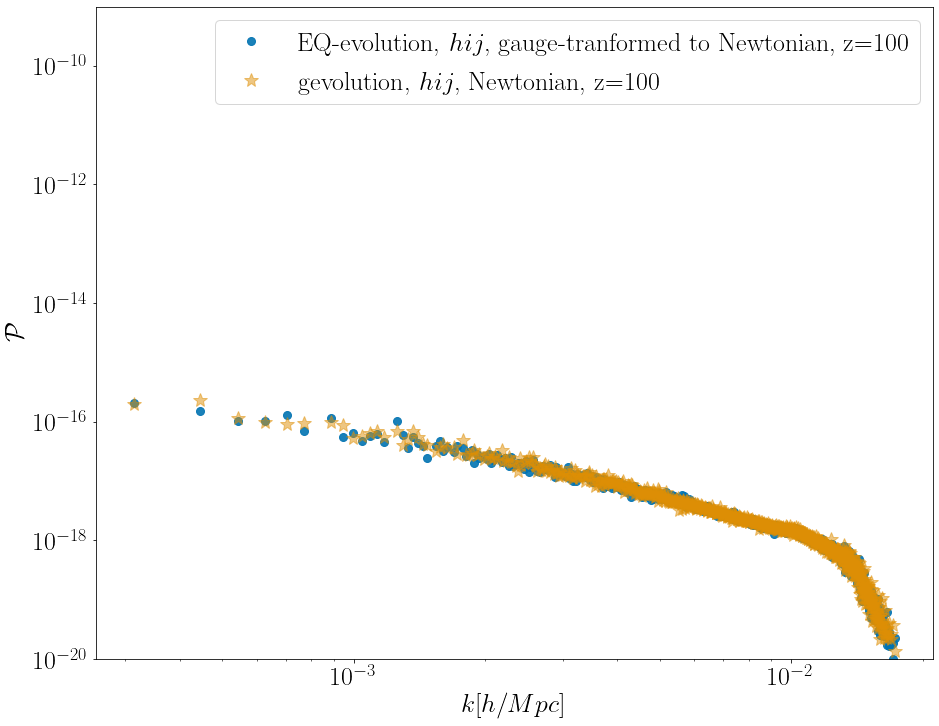

In [153]:


plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,12))

# Reference:

###### hiclass results:
l=0
for i in range(0,1):
    z=redshifts[i]

    k_h = data['kgb_ev']['hij']['z='+str(redshifts[i])] [:,0]
    pk = data['kgb_ev']['hij']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"o", color = Colors[l],markersize=8 , label = "EQ-evolution,  $hij$, gauge-tranformed to Newtonian, z="+str(z), alpha=0.9)

    
    k_h = data['gev']['hij']['z='+str(redshifts[i])] [:,0]
    pk = data['gev']['hij']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"*", color = Colors[l+1],markersize=15 , label = "gevolution, $hij$, Newtonian, z="+str(z), alpha=0.5)

    l=l+1
    


plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1.e-4,1.e0)
plt.ylim(1.e-20,1.e-9)


# Bi power

(1e-14, 1e-06)

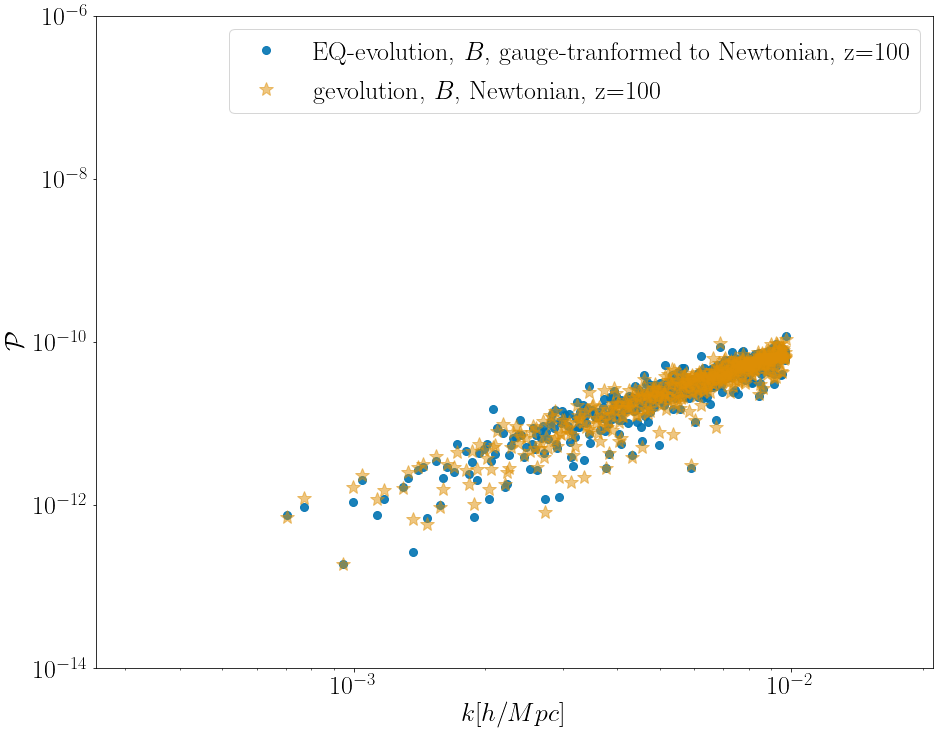

In [155]:


plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,12))

# Reference:

###### hiclass results:
l=0
for i in range(0,1):
    z=redshifts[i]

    k_h = data['kgb_ev']['B']['z='+str(redshifts[i])] [:,0]
    pk = data['kgb_ev']['B']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"o", color = Colors[l],markersize=8 , label = "EQ-evolution,  $B$, gauge-tranformed to Newtonian, z="+str(z), alpha=0.9)

    
    k_h = data['gev']['B']['z='+str(redshifts[i])] [:,0]
    pk = data['gev']['B']['z='+str(redshifts[i])] [:,1]
    plt.plot(k_h, (pk),"*", color = Colors[l+1],markersize=15 , label = "gevolution, $B$, Newtonian, z="+str(z), alpha=0.5)
    l=l+1
    


plt.legend()
plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1.e-4,1.e-1)
plt.ylim(1.e-14,1.e-6)


# Testing the values of the columns

## Background values:

In [17]:
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_ur = interpolate.interp1d(bg[:,0] ,bg[:,12])
rho_g = interpolate.interp1d(bg[:,0] ,bg[:,9])
rho_tot = interpolate.interp1d(bg[:,0] ,bg[:,14])
rho_smg = interpolate.interp1d(bg[:,0] ,bg[:,19])
p_smg = interpolate.interp1d(bg[:,0] ,bg[:,20])

z=100

Omega_smg=rho_smg(z)/rho_tot(z);
Omega_m = (rho_cdm(z)+rho_b(z))/rho_tot(z);
Omega_rad=(rho_ur(z) + rho_g(z))/rho_tot(z);
w_smg = p_smg(z)/rho_smg(z);

print("Omega_smg:", Omega_smg," Omega_m: ",Omega_m, "Omega_rad: ",Omega_rad, " w_smg: ",w_smg)

Omega_smg: 3.325946888184387e-05  Omega_m:  0.9711507188201423 Omega_rad:  0.02881602171116236  w_smg:  -0.7963640632835104


## transfer functions:

In [20]:
i=0
z= redshifts[i];
k= class_tk[i][:,0]
h_prime=class_tk[i][:,11]
eta_prime = class_tk[i][:,13]
psi = class_tk[i][:,9]
phi = class_tk[i][:,8]
eta = class_tk[i][:,12]
alpha = (h_prime + 6.*eta_prime)/(2.*k*h*k*h);
alpha_prime = psi + phi - eta;
#######
psi_int = interpolate.interp1d(k ,psi)
phi_int = interpolate.interp1d(k , phi)
eta_int = interpolate.interp1d(k , eta)
alpha_int = interpolate.interp1d(k , alpha)
alpha_prime_int = interpolate.interp1d(k , alpha_prime)

delta_b = interpolate.interp1d(k , class_tk[i][:,2]) 
delta_cdm = interpolate.interp1d(k , class_tk[i][:,3]) 
delta_g = interpolate.interp1d(k , class_tk[i][:,1]) 
delta_v_x = interpolate.interp1d(k , class_tk[i][:,5]) 
delta_v_x_prime = interpolate.interp1d(k , class_tk[i][:,6]) 
delta_tot = interpolate.interp1d(k , class_tk[i][:,7]) 
t_b = interpolate.interp1d(k , class_tk[i][:,17]) 
t_tot = interpolate.interp1d(k , class_tk[i][:,19]) 
w=-.9
matter = ((rho_b(z)+rho_cdm(z))*(1+w *0))/rho_tot(z)
rad = ((rho_ur(z)+rho_g(z))*(1+1/3.))/rho_tot(z)
# fld = (rho_fld(z)*(1+w_fld(z)))/rho_tot(z)
### Check if the values make sense:

k_p=0.102345;
print("z: ",z, "delta_tot: ",delta_tot(k_p), "t_tot: ", t_tot(k_p), "k: ",k_p," alpha:",alpha_int(k_p)
      , " alpha_prime: ",alpha_prime_int(k_p),"delta_tot_g: "
      , delta_tot(k_p)-alpha_int(k_p) * 3. * (matter + rad  ) * Hconf_hiclass(z), "t_tot_g: ", t_tot(k_p) + alpha_int(k_p) *k_p*k_p*h*h)

print("z: ",z, "delta_b: ",delta_b(k_p), "t_b: ", t_b(k_p), "k: ",k_p," alpha:",alpha_int(k_p)
      , " alpha_prime: ",alpha_prime_int(k_p),"delta_tot_g: "
      , delta_b(k_p)-alpha_int(k_p) * 3. * (1.) * Hconf_hiclass(z), "t_b_g: ", t_b(k_p) + alpha_int(k_p) *k_p*k_p*h*h)



print("z: ",z, "v_x: ",delta_v_x(k_p), "v_x_prime: ", delta_v_x_prime(k_p), "k: ",k_p," alpha:",alpha_int(k_p)
      , " alpha_prime: ",alpha_prime_int(k_p),"v_x_g: "
      , delta_v_x(k_p)-alpha_int(k_p) * 3. * (1.) * Hconf_hiclass(z), "v_x_prime_g: ", delta_v_x_prime(k_p) + alpha_prime_int(k_p))



z:  100 delta_tot:  -148.93441091879507 t_tot:  -0.009191315077799704 k:  0.102345  alpha: 40.76315684328044  alpha_prime:  0.024718984435629827 delta_tot_g:  -149.09289869179273 t_tot_g:  0.1856714786350482
z:  100 delta_b:  -103.0815910596838 t_b:  -0.011947900270092685 k:  0.102345  alpha: 40.76315684328044  alpha_prime:  0.024718984435629827 delta_tot_g:  -103.23857615858304 t_b_g:  0.18291489344275524
z:  100 v_x:  50.50202106314484 v_x_prime:  0.03123081033390956 k:  0.102345  alpha: 40.76315684328044  alpha_prime:  0.024718984435629827 v_x_g:  50.3450359642456 v_x_prime_g:  0.05594979476953939


# Gauge transformation study

## CLASS k-essence Newtonian vs Synchronous

In [116]:
# redshifts = [1000, 500,100,50,10,3,1,0];
# pk_new=[];
# pk_sync=[];
# tk_new=[];
# tk_sync=[];

# for i in range(np.shape(redshifts)[0]):
#     pk_new.append(np.loadtxt("./../../EQ_hi_class/output/class_new_z"+str(i+1)+"_pk.dat"));
#     pk_sync.append(np.loadtxt("./../../EQ_hi_class/output/class_sync_z"+str(i+1)+"_pk.dat"))

#     tk_new.append(np.loadtxt("./../../EQ_hi_class/output/class_new_z"+str(i+1)+"_tk.dat"));
#     tk_sync.append(np.loadtxt("./../../EQ_hi_class/output/class_sync_z"+str(i+1)+"_tk.dat"));

# #     newt_tk = 

## Power spectrum

In [157]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,6):
    
#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;

#     z= redshifts[i];
#     plt.plot(pk_new[i][:,0], pk_new[i][:,1],"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(pk_sync[i][:,0], pk_sync[i][:,1],"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e0)
# # plt.ylim(1.e-14,1.e-8)

## Transfer functions

### d_cdm

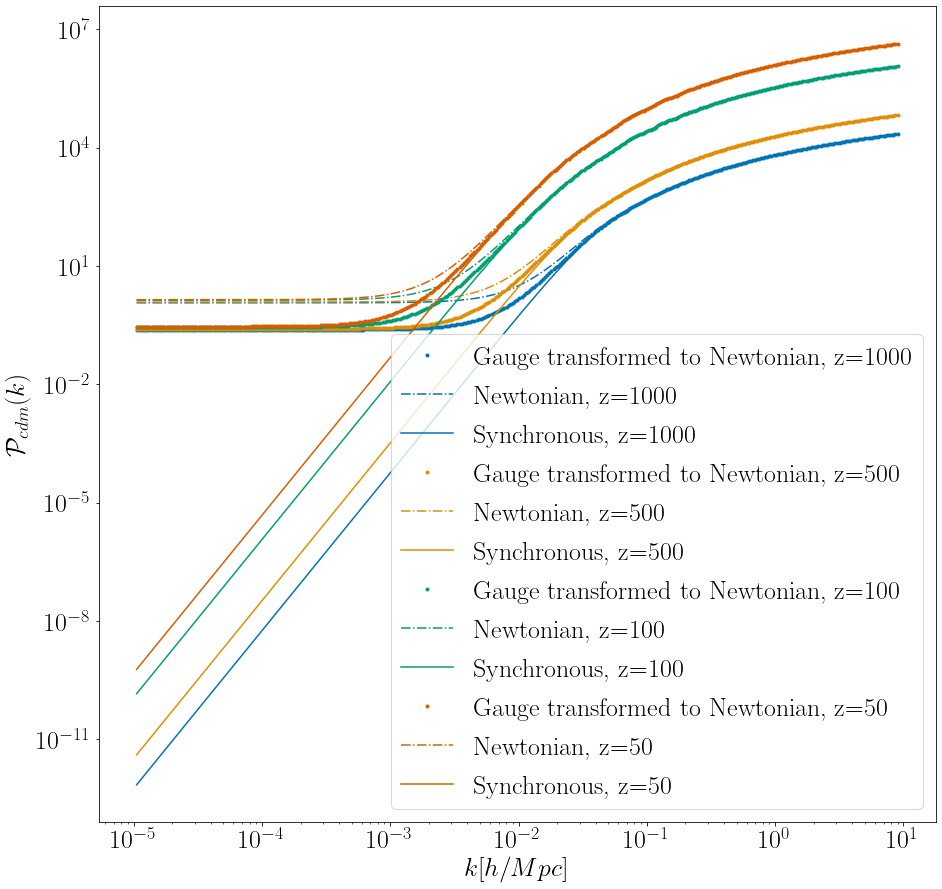

In [120]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )

# for i in range(0,4):
    
#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     z= redshifts[i];

#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,3]-alpha * 3. * Hconf_hiclass(z))**2,".",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
#     plt.plot(tk_new[i][:,0], (tk_new[i][:,3])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,3])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{cdm}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-2)
# # plt.ylim(1e-2,10.0)

### d_b

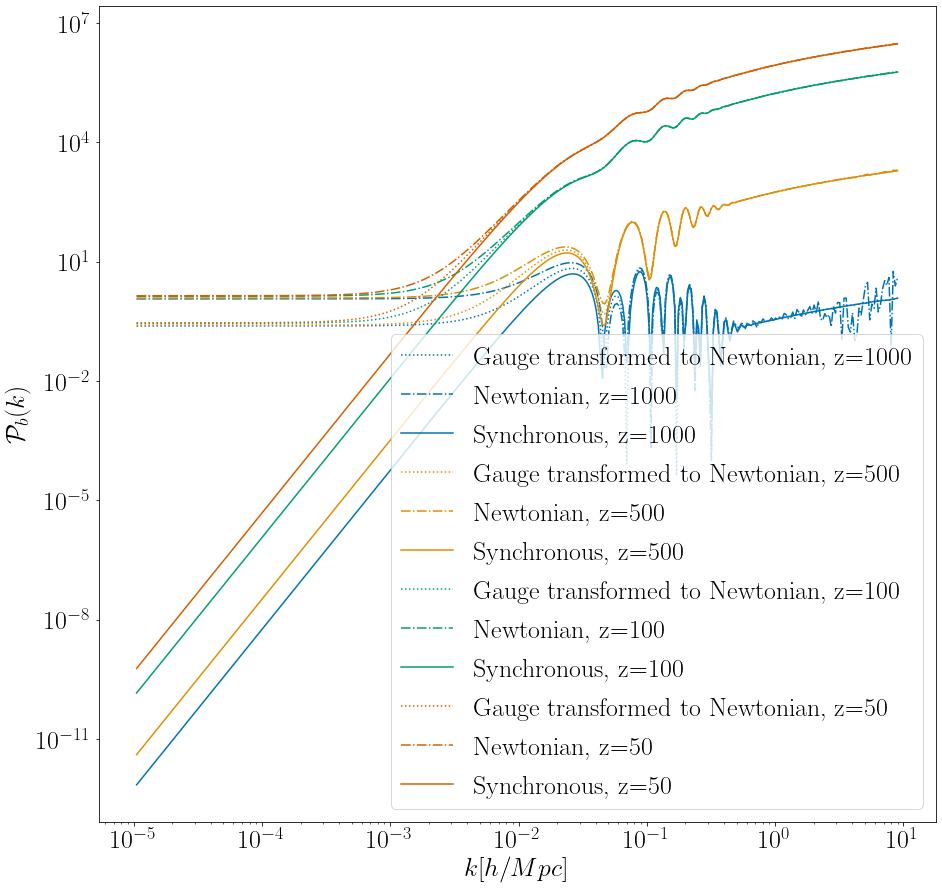

In [28]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,4):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,2]-alpha * 3. * Hconf_hiclass(z))**2,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,2])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,2])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{b}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-2)
# # plt.ylim(1.,10.0)

### d_g

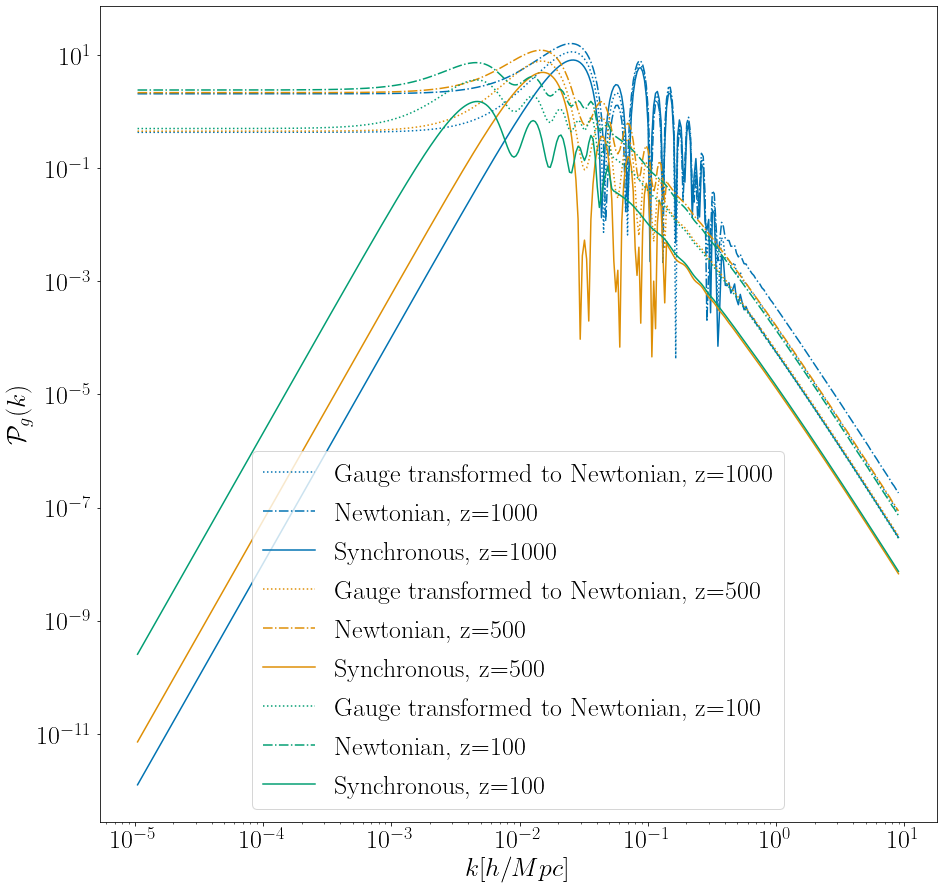

In [30]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,3):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,1]-alpha * 4. * Hconf_hiclass(z))**2,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,1])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,1])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{g}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-2)
# # plt.ylim(1.,10.0)

### d_fld

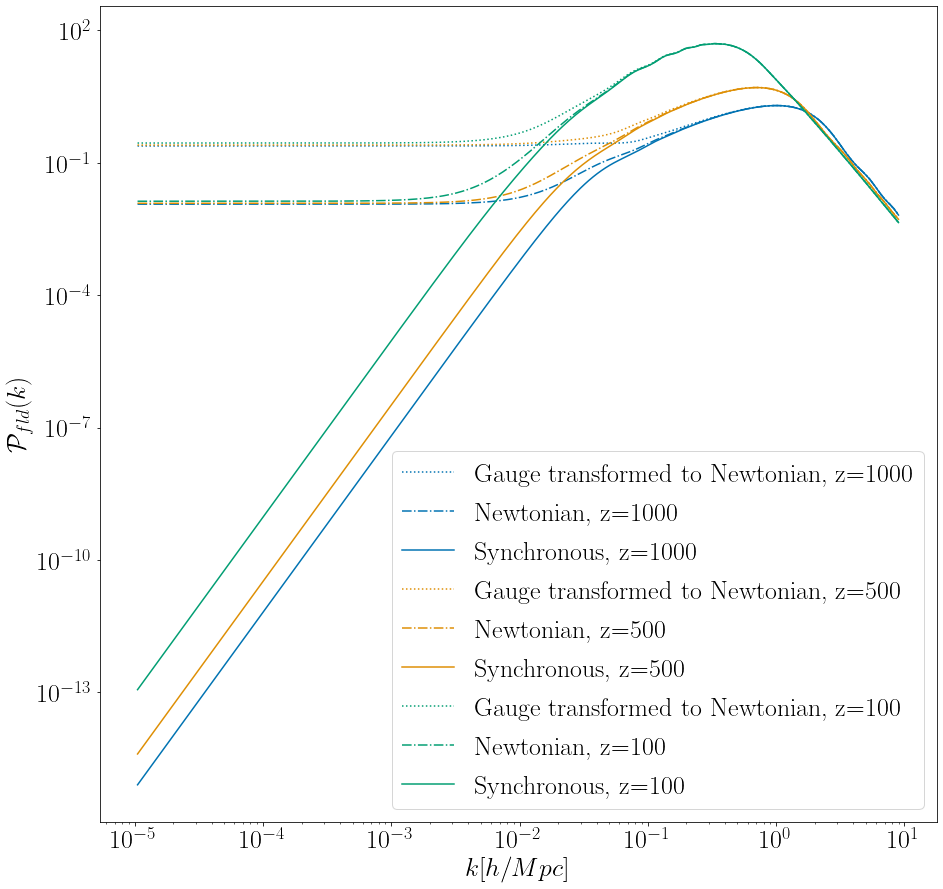

In [32]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,3):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,4]-alpha * 3. * Hconf_hiclass(z))**2,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,4])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,4])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{fld}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-3)
# # plt.ylim(1.e-2,3.e-2)

### t_cdm

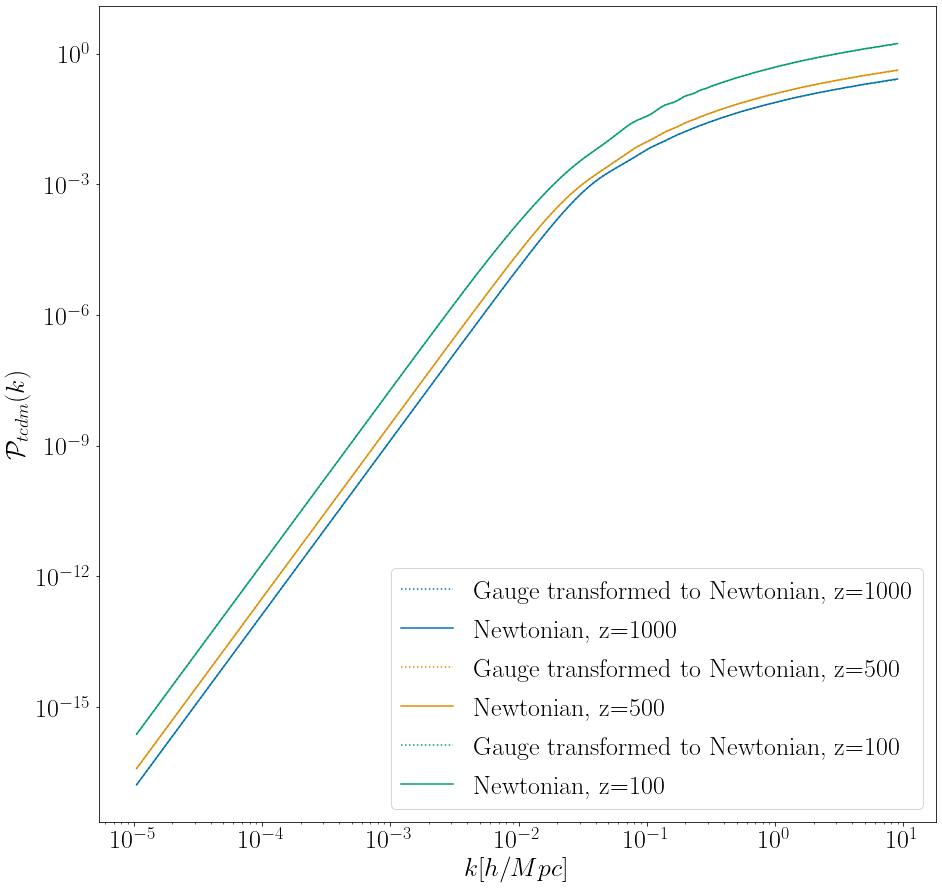

In [47]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,3):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (0-alpha*k*k)**2,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,14])**2,"-", color = Colors[l] , label = r"Newtonian, z="+str(z))
# #     plt.plot(tk_sync[i][:,0], (0)**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{tcdm}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-3)
# # plt.ylim(1.e-2,3.e-2)

### t_b

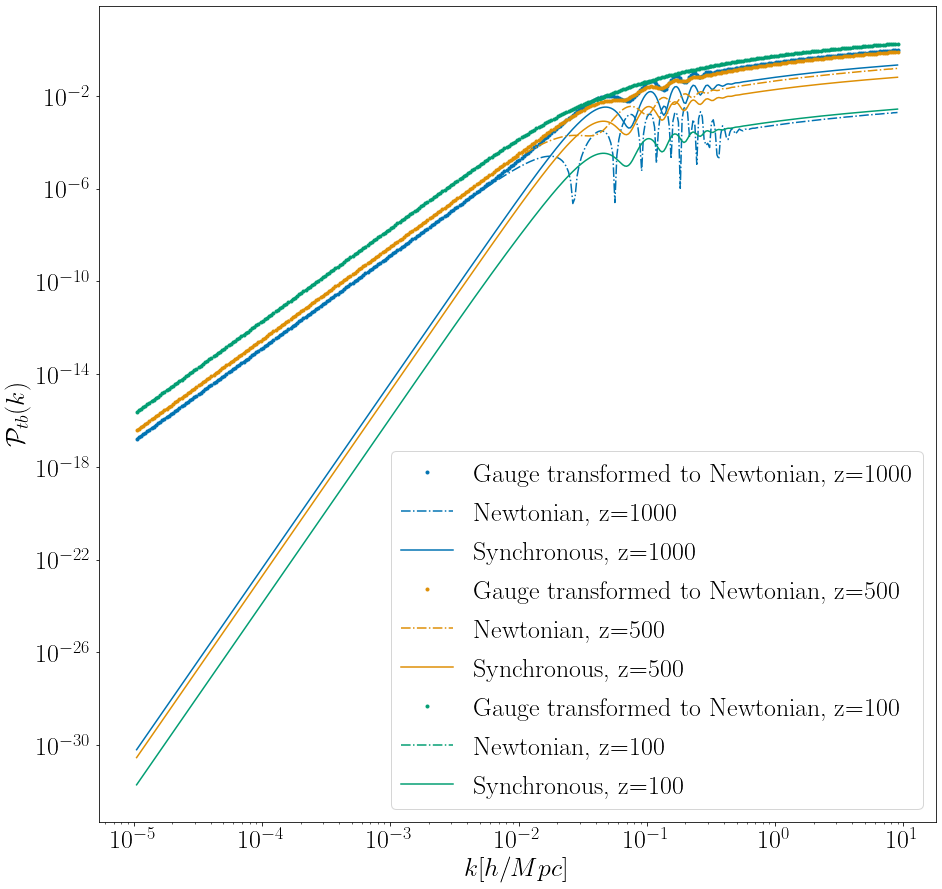

In [52]:
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15,15))

# l=0
# for i in range(0,3):
#     z= redshifts[i];

#     k= tk_sync[i][:,0]
#     h_prime=tk_sync[i][:,10]
#     eta_prime = tk_sync[i][:,12]
#     psi = tk_sync[i][:,8]
#     phi = tk_sync[i][:,7]
#     eta = tk_sync[i][:,11]
#     alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
#     alpha_prime = psi + phi - eta;
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,16]-alpha*k*k)**2,".",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

#     plt.plot(tk_new[i][:,0], (tk_new[i][:,13])**2,"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (tk_sync[i][:,16])**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
#     l=l+1
# plt.legend()
# plt.ylabel(r"$\mathcal{P}_{tb}(k)$")
# plt.xlabel(r"$k[h/Mpc]$")
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1.e-5,1.e-3)
# # plt.ylim(1.e-2,3.e-2)

### t_tot